# Set up

In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Iris Dataset
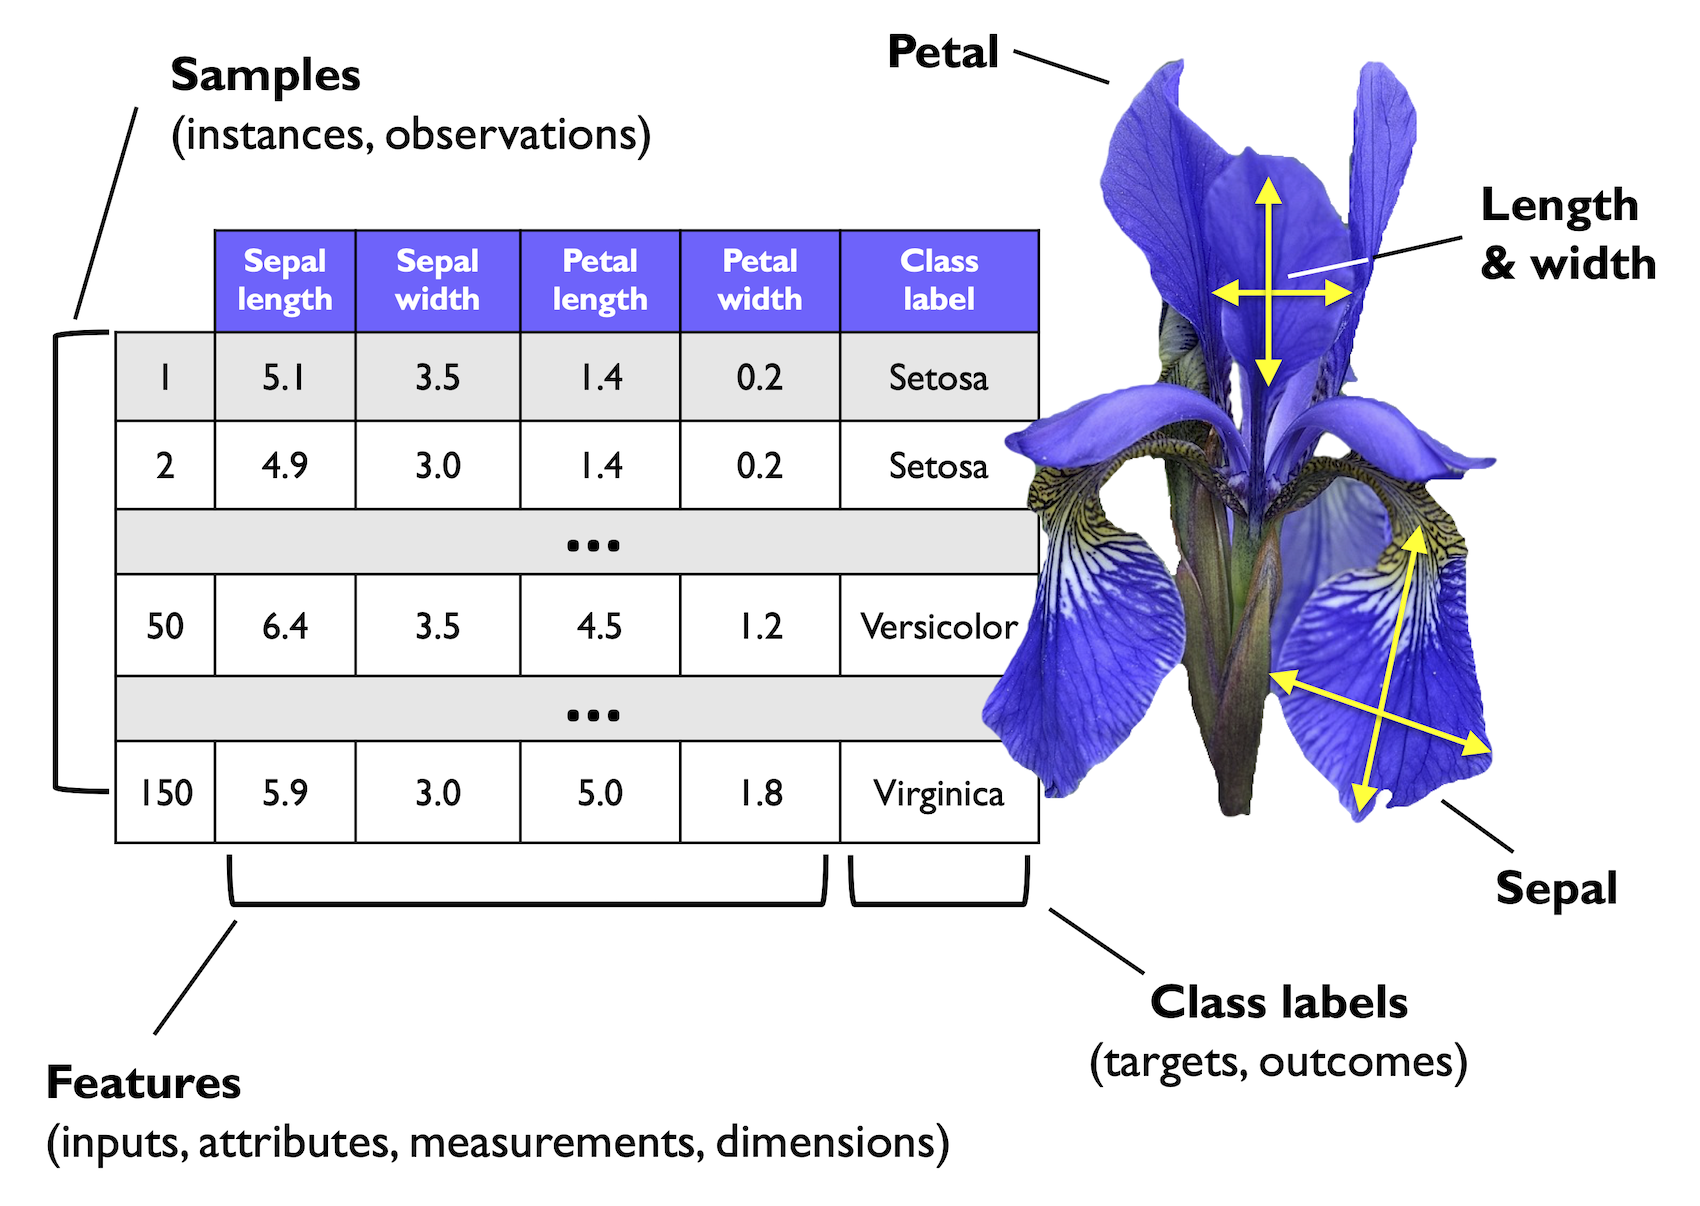

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dhimanray/Machine_Learning_for_Chemistry/main/Classification/iris_data.csv')

df.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


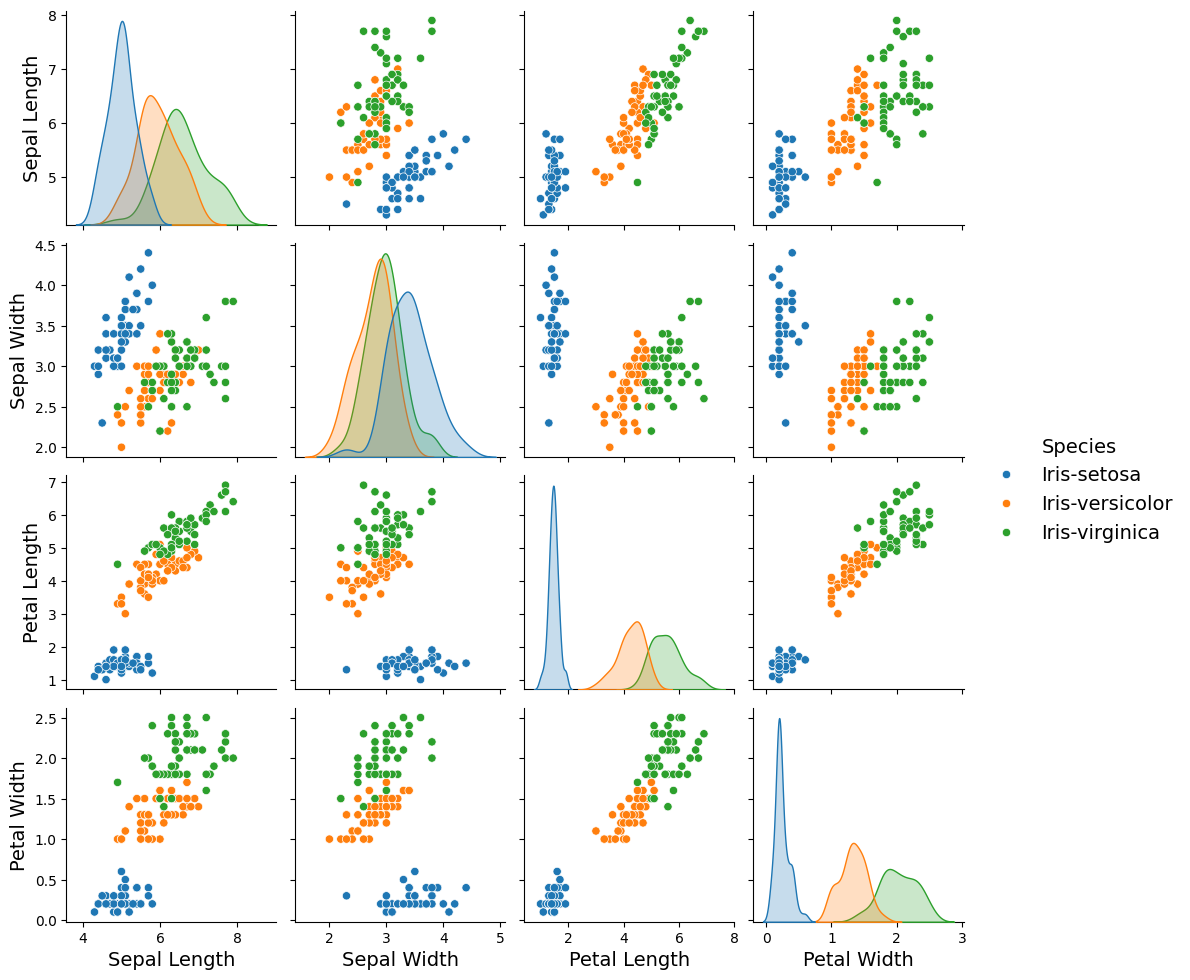

In [3]:
import seaborn as sns
sns.pairplot(df,hue='Species')

# Binary Classification: Iris-virginica or not?

We will first do in 1D using Petal Width as only feature

In [4]:
#features
X = df[["Petal Width"]].values

#make target: y = 1 if Iris-virginica and 0 otherwise
y_bool = df[['Species']].values == 'Iris-virginica'

#convert boolean to binary (0, 1)
y = y_bool*1
y = y[:,0]
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)



LogisticRegression()

**Plot Data**

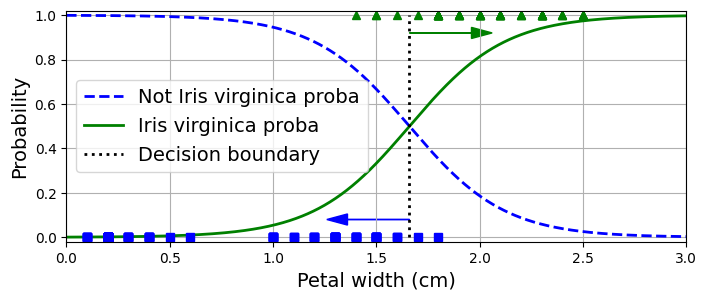

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()


plt.show()

# Logistic Regression in 2D

In [7]:
X = df[["Petal Length","Petal Width"]].values

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

# Define a function for plotting decision boundary in 2D

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    lab = np.array(lab, dtype=float)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

# Plot the data and decision boundary

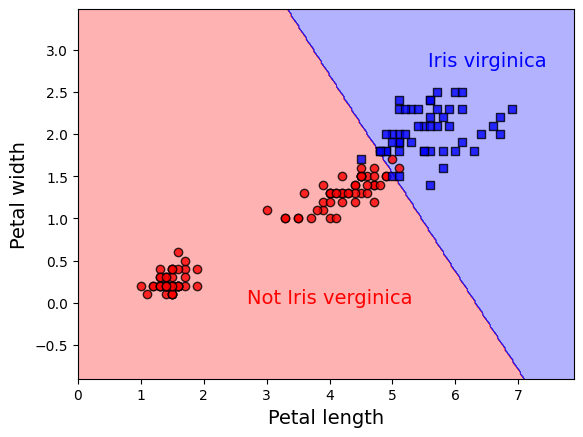

In [9]:
plot_decision_regions(X,y, log_reg)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(4, 0, "Not Iris verginica", color="r", ha="center")
plt.text(6.5, 2.8, "Iris virginica", color="b", ha="center")
plt.show()

# Multiclass Classification: Softmax Regression

In [10]:
X = df[["Petal Length", "Petal Width"]].values
y = df["Species"].values

# Label encoding
We do not need to explicitly do the one-hot-encoding. It is taken care of by scikitlearn

In [11]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y_new = enc.fit_transform(y)

print(y_new)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X, y_new)

LogisticRegression(C=30, random_state=42)

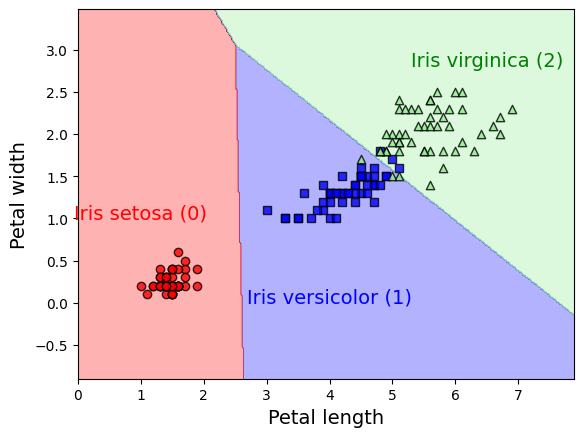

In [13]:
plot_decision_regions(X,y_new,softmax_reg)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(1,1, "Iris setosa (0)", color="r", ha="center")
plt.text(4, 0, "Iris versicolor (1)", color="b", ha="center")
plt.text(6.5, 2.8, "Iris virginica (2)", color="g", ha="center")
plt.show()

In [14]:
softmax_reg.predict([[4, 0.5]])

array([1])

# Support Vector Machines (SVM): Linear Binary Classification

In [15]:
X = df[["Petal Length","Petal Width"]].values
#make target: y = 1 if Iris-virginica and 0 otherwise
y_bool = df[['Species']].values == 'Iris-virginica'

#convert boolean to binary (0, 1)
y = y_bool*1
y = y[:,0]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


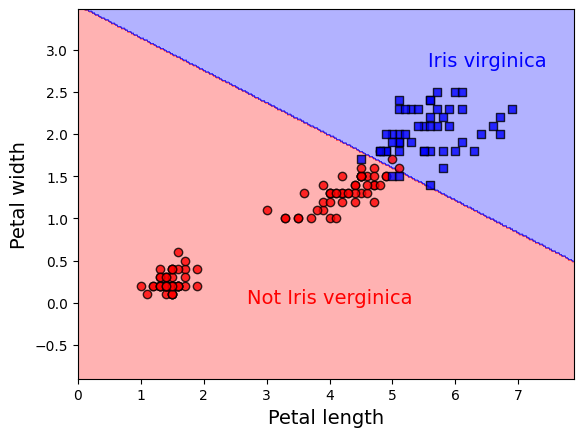

In [16]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
svm.fit(X,y)

plot_decision_regions(X,y,svm)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(4, 0, "Not Iris verginica", color="r", ha="center")
plt.text(6.5, 2.8, "Iris virginica", color="b", ha="center")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


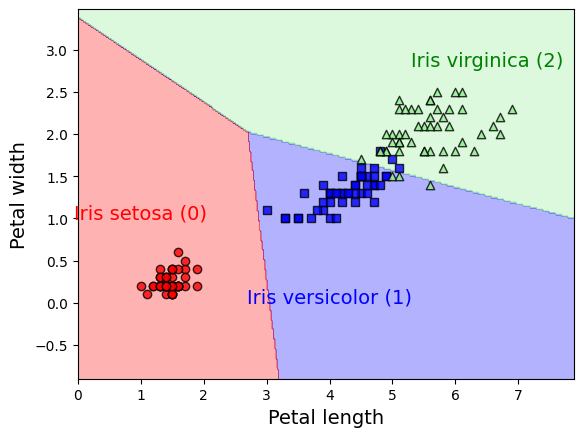

In [17]:
X = df[["Petal Length", "Petal Width"]].values
y = df["Species"].values

enc = LabelEncoder()
y_new = enc.fit_transform(y)

svm_multi = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5,C=10))
svm_multi.fit(X,y_new)

plot_decision_regions(X,y_new,svm_multi)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(1,1, "Iris setosa (0)", color="r", ha="center")
plt.text(4, 0, "Iris versicolor (1)", color="b", ha="center")
plt.text(6.5, 2.8, "Iris virginica (2)", color="g", ha="center")
plt.show()

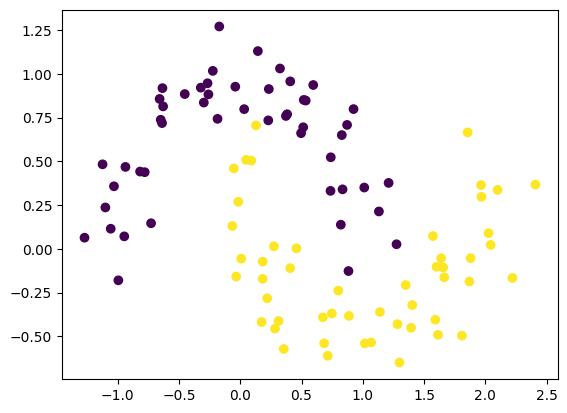

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

# Some more code for plotting

In [19]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)




# Linear SVM cannot classify non-linear data

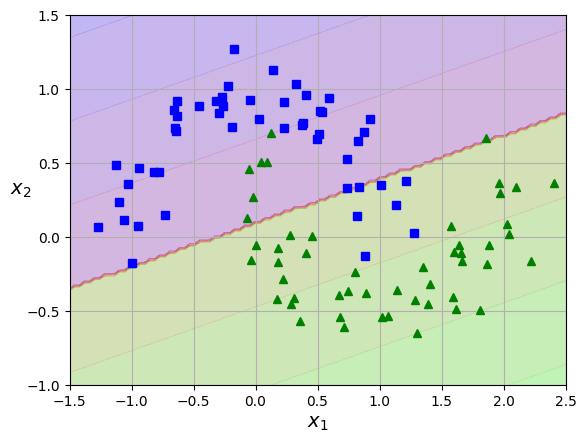

In [20]:
linear_svm_clf = make_pipeline(StandardScaler(),
    LinearSVC(C=1, max_iter=10_000, dual=False, random_state=42)
)
linear_svm_clf.fit(X, y)

plot_predictions(linear_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Do Linear SVM in higher dimension (expanding polynomial)

Play with the parameters Polynomial Degree and C to see bias variance trade-off!

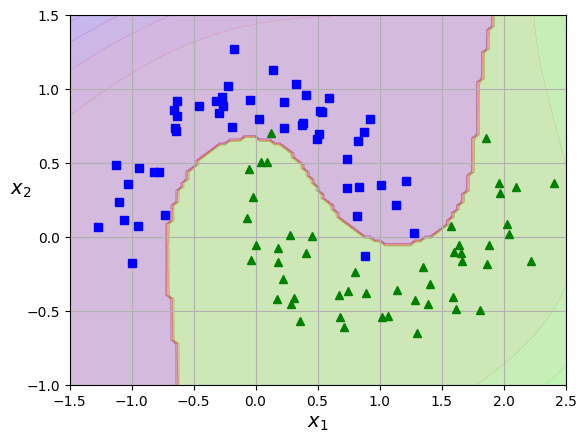

In [21]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=5),
    StandardScaler(),
    LinearSVC(C=1, max_iter=10_000, dual=False, random_state=42)
)
polynomial_svm_clf.fit(X, y)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Kernel SVM

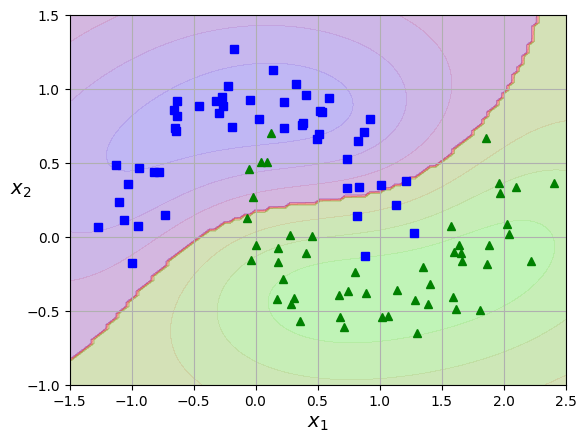

In [22]:
from sklearn.svm import SVC

kernel_svm_clf = make_pipeline(StandardScaler(),
                               SVC(C=0.1, max_iter=10_000,kernel='rbf',random_state=42))
kernel_svm_clf.fit(X, y)

plot_predictions(kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Measuring Classification accuracy (Confusion Matrix)

To measure classification accuracy, we need to divide the data into training and test sets. We will train the classifier on the training data and measure classification accuracy on the test data. This is necessary because we want to know how our classifier generalizes to data that it had not seen.

We will start with the binary classification for the non-linear moon data. As last time we generated only 100 data points, now we will generate some more data.

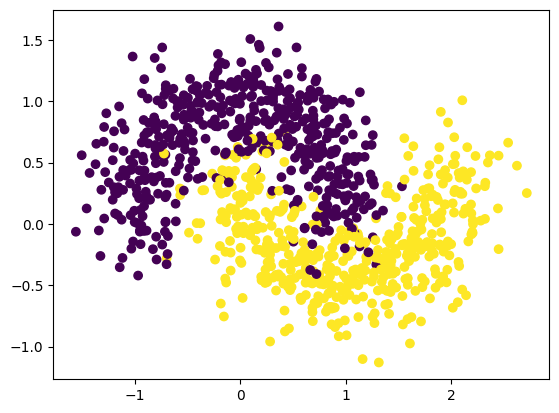

In [117]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)



Text(0.5, 1.0, 'Test Data')

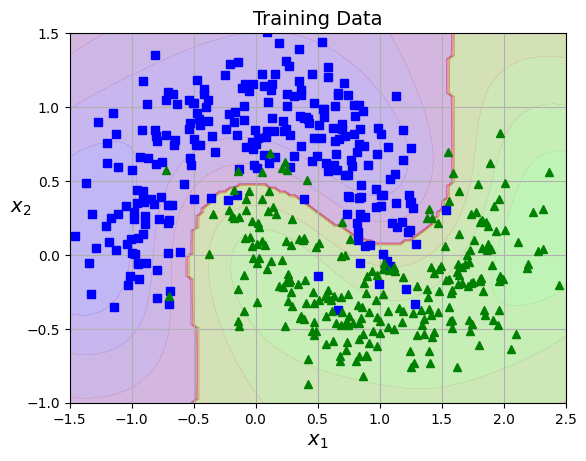

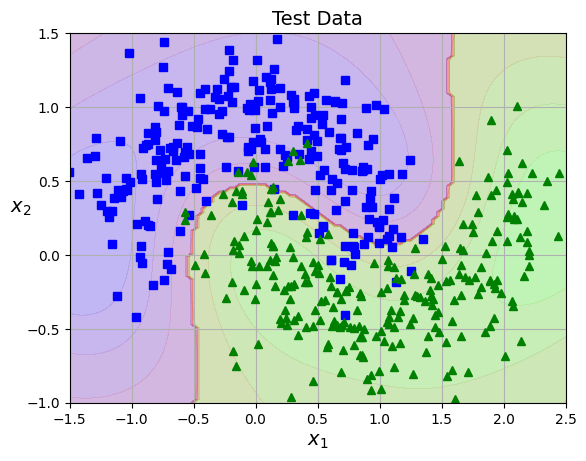

In [139]:
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) #50% of the data is random assigned as test set

#train the model on the training set
kernel_svm_clf = make_pipeline(StandardScaler(),
                               SVC(C=1, max_iter=10_000,kernel='rbf',random_state=42))
kernel_svm_clf.fit(X_train, y_train)

plt.figure()
plot_predictions(kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

#Now we are plotting training data
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plt.title('Training Data')

plt.figure()
plot_predictions(kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

#Now we are plotting test data
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5])
plt.title('Test Data')

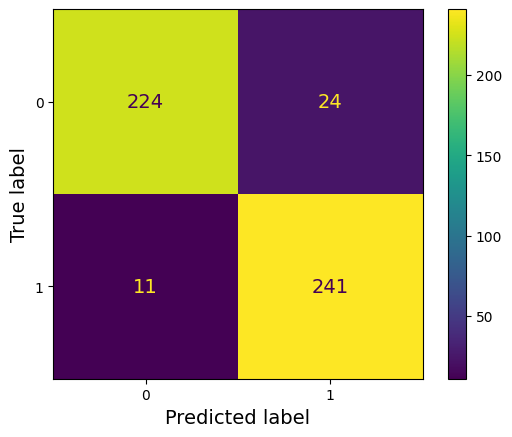

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Compute predictions on the test set
predictions = kernel_svm_clf.predict(X_test)

#calculate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=log_reg.classes_)

#display confudion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()

# Precision, Recall, and F-score

In [141]:
from sklearn.metrics import precision_recall_fscore_support

precison, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions, beta=1.0, average='binary') #beta=1 gives f1 score

print('Precision = ', precison)
print('Recall = ', recall)
print('F1 score = ', f1_score)

Precision =  0.909433962264151
Recall =  0.9563492063492064
F1 score =  0.9323017408123792


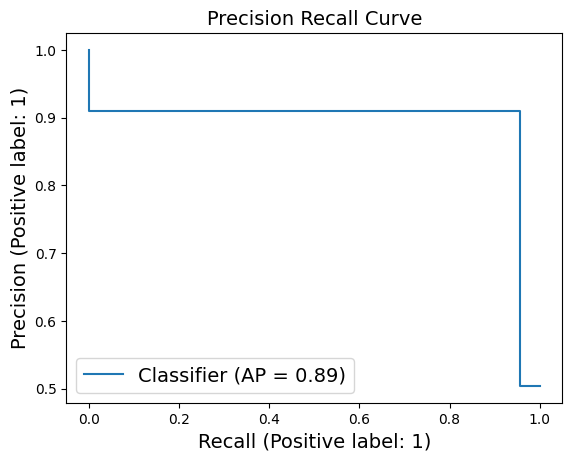

In [142]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, predictions)
plt.title('Precision Recall Curve')
plt.show()


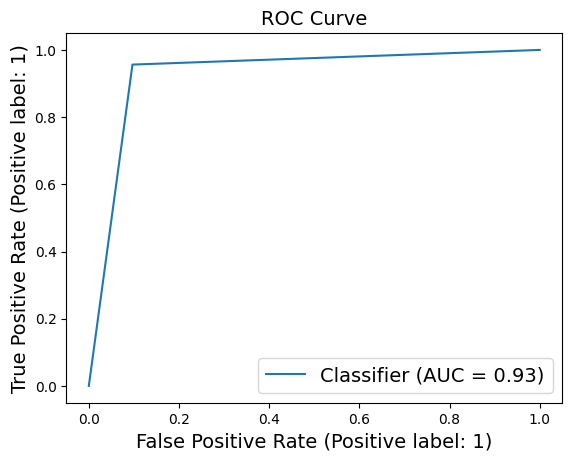

In [143]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, predictions)
plt.title('ROC Curve')
plt.show()

# Accuracy vs Regularization

In [144]:
def acc_vs_reg_svm(C=0.1):
    #train the model on the training set
    k_svm_clf = make_pipeline(StandardScaler(),
                               SVC(C=C, max_iter=10_000,kernel='rbf'))
    k_svm_clf.fit(X_train, y_train)
    y_pr = k_svm_clf.predict(X_test)

    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pr, beta=1.0, average='binary')

    return precision, recall, f1_score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefin

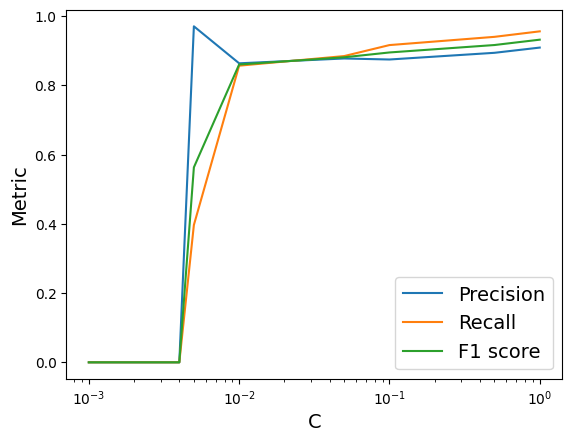

In [145]:
C_list = [1e-3,2e-3,3e-3,4e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1.]

precision_list = []
recall_list = []
f1_list = []
for C in C_list:
    precision, recall, f1_score = acc_vs_reg_svm(C)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score)

plt.figure()
plt.plot(C_list,precision_list,label='Precision')
plt.plot(C_list,recall_list,label='Recall')
plt.plot(C_list,f1_list,label='F1 score')
plt.xlabel('C')
plt.ylabel('Metric')
plt.legend()
plt.xscale('log')

# Chemistry Example (Conformational states of Alane Dipeptide)

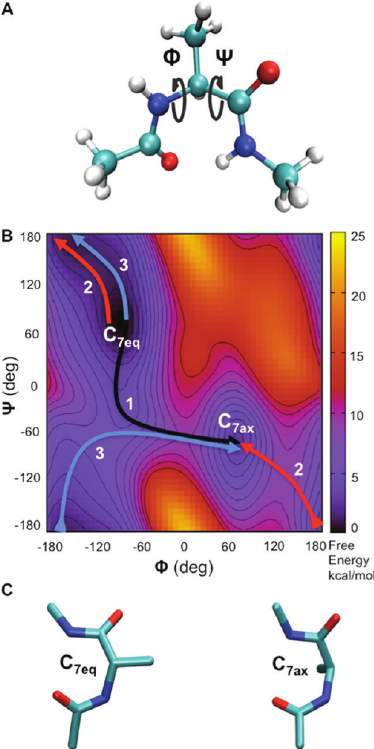

In [146]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dhimanray/Machine_Learning_for_Chemistry/main/datasets/alanine.csv',sep=' ')

df.head(10)

,phi,psi,state
0,-2.37,2.64,0
1,-2.75,2.72,0
2,-2.53,2.94,0
3,-2.27,2.49,0
4,-2.04,2.78,0
5,-2.55,2.58,0
6,-2.70,2.90,0
7,-2.32,2.91,0
8,-2.54,2.41,0
9,-2.09,2.88,0


Text(0, 0.5, 'psi')

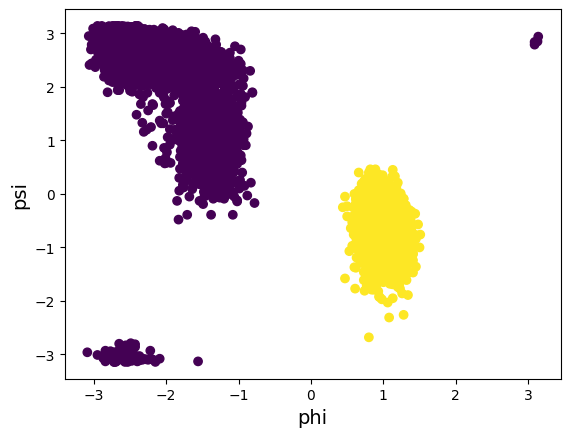

In [147]:
X = df[['phi','psi']].to_numpy()
y = df[['state']].to_numpy()
y = y.ravel() # y.ravel() because fit() expects 1D targets

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('phi')
plt.ylabel('psi')

In [148]:
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) #50% of the data is random assigned as test set

Logistic Regression

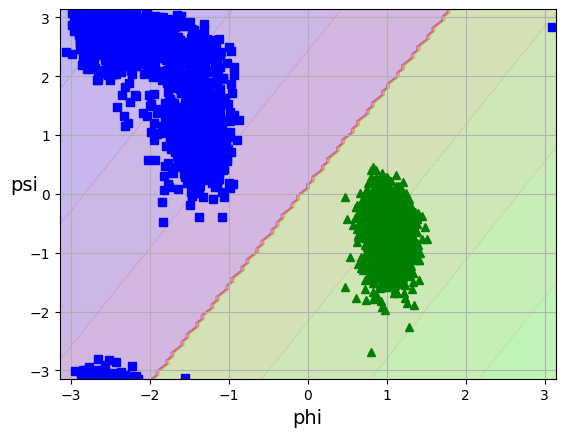

<Figure size 640x480 with 0 Axes>

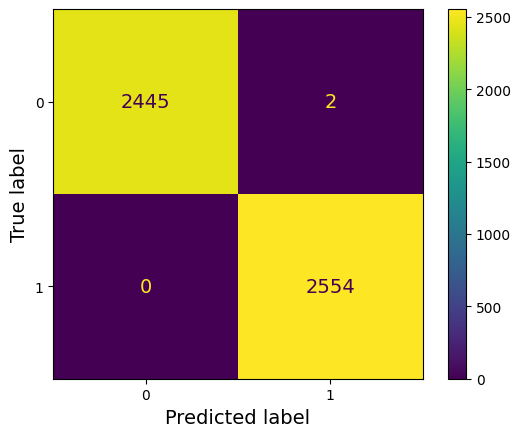

In [149]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_predict = log_reg.predict(X_test)

plt.figure()
plot_predictions(log_reg, [-3.14, 3.14, -3.14, 3.14])

#Now we are plotting test data
plot_dataset(X_test, y_test, [-3.14, 3.14, -3.14, 3.14])

plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

#calculate confusion matrix
cm = confusion_matrix(y_test, y_predict, labels=log_reg.classes_)

#display confudion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure()
disp.plot()
plt.show()

Linear SVM

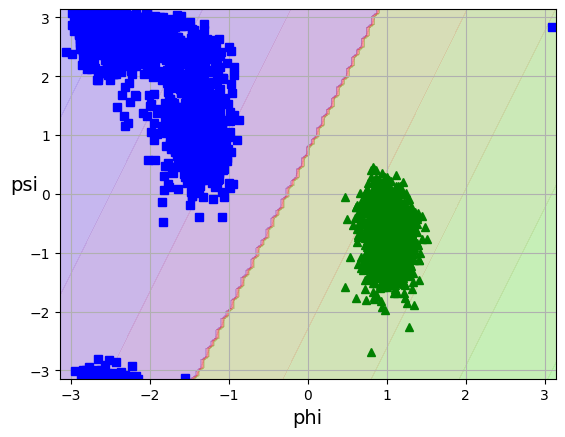

<Figure size 640x480 with 0 Axes>

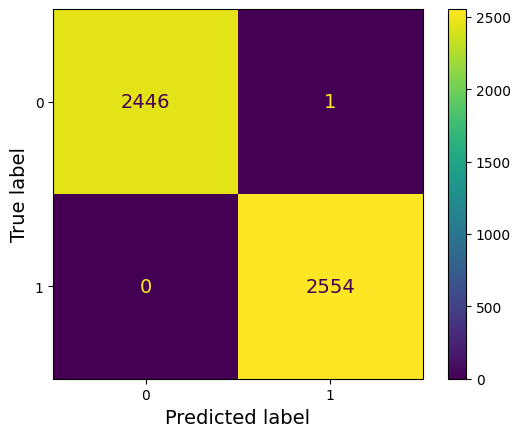

In [150]:
linear_svm_clf = make_pipeline(StandardScaler(),
    LinearSVC(C=0.01, max_iter=10_000, dual=False, random_state=42))
linear_svm_clf.fit(X_train,y_train)

y_predict = linear_svm_clf.predict(X_test)

plot_predictions(linear_svm_clf, [-3.14, 3.14, -3.14, 3.14])

#Now we are plotting test data
plot_dataset(X_test, y_test, [-3.14, 3.14, -3.14, 3.14])

plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

#calculate confusion matrix
cm = confusion_matrix(y_test, y_predict, labels=linear_svm_clf.classes_)

#display confudion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=linear_svm_clf.classes_)
plt.figure()
disp.plot()
plt.show()

Kernel SVM

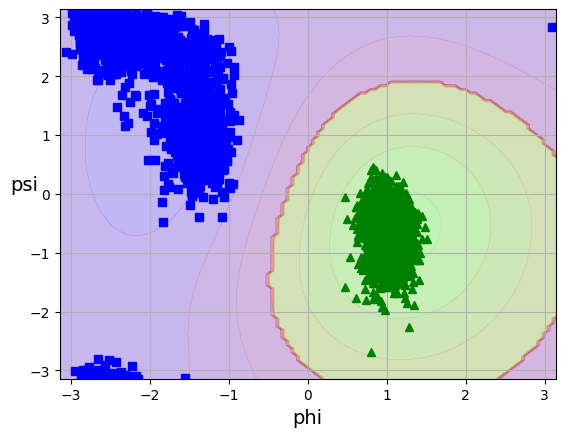

<Figure size 640x480 with 0 Axes>

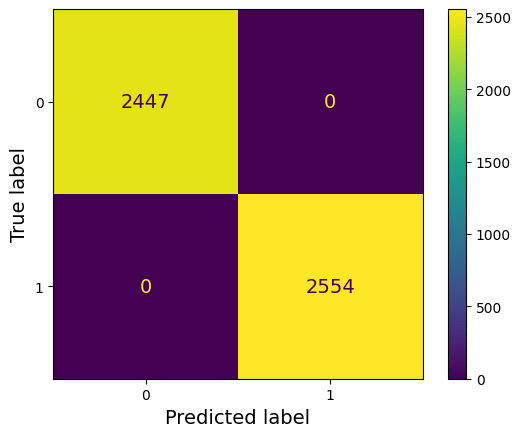

In [151]:
kernel_svm_clf = make_pipeline(StandardScaler(),
    SVC(C=0.1, max_iter=10_000, kernel='rbf', random_state=42))
kernel_svm_clf.fit(X_train,y_train)

y_predict = kernel_svm_clf.predict(X_test)

plot_predictions(kernel_svm_clf, [-3.14, 3.14, -3.14, 3.14])

#Now we are plotting test data
plot_dataset(X_test, y_test, [-3.14, 3.14, -3.14, 3.14])

plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

#calculate confusion matrix
cm = confusion_matrix(y_test, y_predict, labels=kernel_svm_clf.classes_)

#display confudion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=kernel_svm_clf.classes_)
plt.figure()
disp.plot()
plt.show()